In [1]:
# Use distance over median over MAD to calculate z-score and identify outliers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [35]:
# df = pandas.read_excel(open('pro','rb'), sheetname='Runs')
df = pd.read_excel("C:\TEMP\pro.xlsx", sheetname='Runs')

In [78]:
df.head()

,siteid,amar,beg,median_amar
2,1604110045,16.0,124.0,7.0
3,1604110045,16.0,143.0,7.0
4,1604110045,11.0,146.0,7.0
5,1604110045,19.0,106.0,7.0
6,1604110045,12.0,143.0,7.0


In [60]:
df.rename(columns = {'Confirm (Category) - IMAM Program':'confirm'}, inplace = True)
df.confirm.unique()

array([u'Yes'], dtype=object)

In [39]:
# drop all unconfirmed data
# df.confirm = df["Confirm (Category) - IMAM Program"] 
#                Confirm (Category) - IMAM Program  

df = df[df.confirm == 'Yes']

# df[df['coverage'] > 50]
# df_filtered = df.query('salary>30000')
# df[df["Country"] == 'US']
# df_filtered = df[(df.salary >= 30000) & (df.year == 2017)]

In [61]:
# rename vars
df.rename(columns = {'SiteID':'siteid'}, inplace = True)
df.rename(columns = {'Beg_o (Value) - IMAM Program':'beg'}, inplace = True)
df.rename(columns = {'Amar_o (Value) - IMAM Program':'amar'}, inplace = True)

In [62]:
# df = df.drop(['SiteID', 'Last Seen', 'WeekNum (Value) - IMAM Program ', 'Amar_o (Value) - IMAM Program'], axis=1)
# how to drop several columns ?

# Include only a small number of vars. 
df =  df[['siteid','amar','beg']]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43756 entries, 2 to 54368
Data columns (total 3 columns):
siteid    43756 non-null object
amar      40429 non-null float64
beg       40429 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


In [9]:
# remove rows from 2016 ? 

# import isocalendar
# datetime.date(2010, 6, 16).isocalendar()[1]

# extract year from last seen
import datetime
# year = df["Last Seen"].datetime.date
# iterate over rows
year = datetime.datetime.df["Last Seen"].isocalendar()[0]
print year

# one method to make a univariate list of counts of variable outcomes
# iterate over rows
def create_year():
    for row in df["Last Seen":
        # Last Seen not formatted as Datetime
        df.year = df["Last Seen"].datetime.isocalendar()[0]
    return df.year

# Take 1st 4 chars from date to = year
# df.year = df.["Last Seen"][0:3]

SyntaxError: invalid syntax (<ipython-input-9-06070bf1f385>, line 17)

In [86]:
# Data cleaning
# change string to integer
df.amar = pd.to_numeric(df.amar, errors='force', downcast='integer')
df.beg = pd.to_numeric(df.beg, errors='force', downcast='integer')
# Remove all Nan
df = df.query('amar == amar')
df = df.query('beg == beg')

(array([  1.52750000e+04,   8.45000000e+03,   5.57100000e+03,
          3.49100000e+03,   2.32900000e+03,   1.39400000e+03,
          9.71000000e+02,   6.71000000e+02,   4.72000000e+02,
          3.46000000e+02,   2.53000000e+02,   2.00000000e+02,
          1.42000000e+02,   1.32000000e+02,   1.18000000e+02,
          8.00000000e+01,   8.60000000e+01,   6.10000000e+01,
          3.60000000e+01,   4.20000000e+01,   3.30000000e+01,
          3.70000000e+01,   2.80000000e+01,   1.80000000e+01,
          2.50000000e+01,   1.00000000e+01,   1.80000000e+01,
          9.00000000e+00,   8.00000000e+00,   9.00000000e+00,
          7.00000000e+00,   9.00000000e+00,   1.00000000e+01,
          1.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          7.00000000e+00]),
 array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  1

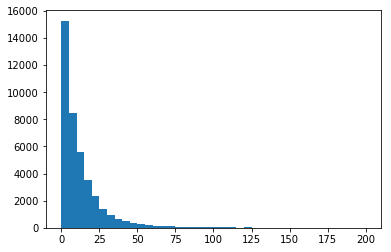

In [103]:
# Histogram of Amar
plt.hist(df.amar, bins = 40, range = (df.amar.min(),200))

In [93]:
print df.amar.quantile([0.25,0.75])
# Quantiles of each object.

0.25     2.0
0.75    16.0
Name: amar, dtype: float64


(array([  1.26550000e+04,   1.06100000e+04,   6.10600000e+03,
          3.27300000e+03,   2.03500000e+03,   1.39700000e+03,
          1.06300000e+03,   6.21000000e+02,   5.13000000e+02,
          4.53000000e+02,   2.93000000e+02,   2.20000000e+02,
          1.92000000e+02,   1.49000000e+02,   1.29000000e+02,
          8.00000000e+01,   6.00000000e+01,   4.90000000e+01,
          5.30000000e+01,   3.10000000e+01,   3.40000000e+01,
          3.20000000e+01,   3.60000000e+01,   2.00000000e+01,
          2.00000000e+01,   2.00000000e+01,   2.70000000e+01,
          1.70000000e+01,   1.90000000e+01,   1.10000000e+01,
          1.10000000e+01,   1.20000000e+01,   1.70000000e+01,
          2.00000000e+01,   5.00000000e+00,   6.00000000e+00,
          2.10000000e+01,   1.60000000e+01,   5.00000000e+00,
          1.60000000e+01]),
 array([    0.   ,    49.975,    99.95 ,   149.925,   199.9  ,   249.875,
          299.85 ,   349.825,   399.8  ,   449.775,   499.75 ,   549.725,
          599.7  ,

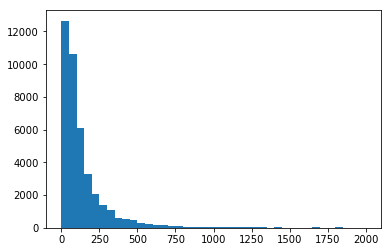

In [73]:
df['median_amar'] = df.amar.median()
# how to use simple python vars instead of col vars
# just calculate everything at once
df.median_amar

7.0

In [83]:
# Median absolute deviation
from statsmodels.robust.scale import mad
# constant = 1
df['mad_amar'] = mad(df.amar, c=1)

df.mad_amar.unique()

array([ 6.])

In [85]:
# Median of the differences of absolute value of (median - value)
mad_amar2 =(abs(df.amar - df.amar.median())).median()
mad_amar2

6.0

In [94]:
# Consistency constant and outlier cut-off

# if the distribution of observations is normal, we can use 1.4826 as a normalization factor
# with the  normalization factor, we can interpret the results as Z-scores

# if the distribution is not normal
# use 1 / median. 75 Percentile

# 1 divided by value of 75th percentile of amar
print 1. / 16

print 1 / (2 / 3 ** 0.5)

0.0625
0.866025403784


In [116]:
consistency_constant = 1 / (2 / 3 ** 0.5)
df['mad_amar2'] = mad(df.amar, c=consistency_constant)

mad_amar2 = 6.92
print "-3 SD = %s +3 SD is %s" % (6 - mad_amar2 * 3, 6 + mad_amar2 * 3)
# this is not appropriate as the distribution is not normal

-3 SD = -14.76 +3 SD is 26.76


In [110]:
print df.amar.mean()
print df.amar.std()

12.8436362512
31.0570323431


In [120]:
# to use MAD with non-symetrical distributions - use Double MAD

def double_mad(var): 
    df = df.query('var == var')
    median = df.var.median()
    left_med = median(abs.dev[x<=m])
    right_med = median(abs.dev[x>m])
    
    if left_med==0 | right_med==0:
        break
    
    return median

print double_mad()

# Double MAD with, say, a cutoff of 3:
# DoubleMAD <- function(x, zero.mad.action="warn"){
#    # The zero.mad.action determines the action in the event of an MAD of zero.
#    # Possible values: "stop", "warn", "na" and "warn and na".
#    x         <- x[!is.na(x)]
#    m         <- median(x)
#    abs.dev   <- abs(x - m)
#    left.mad  <- median(abs.dev[x<=m])
#    right.mad <- median(abs.dev[x>=m])
#    if (left.mad == 0 || right.mad == 0){
#       if (zero.mad.action == "stop") stop("MAD is 0")
#       if (zero.mad.action %in% c("warn", "warn and na")) warning("MAD is 0")
#       if (zero.mad.action %in% c(  "na", "warn and na")){
#          if (left.mad  == 0) left.mad  <- NA
#          if (right.mad == 0) right.mad <- NA
#       }
#    }
#    return(c(left.mad, right.mad))

UnboundLocalError: local variable 'df' referenced before assignment

In [136]:
# x = remove Nan
df['median'] = df.amar.median()

# np.where

# filter entire dataset
left = df.loc[(df["amar"] <= df["median"])]
right = df.loc[(df["amar"] > df["median"])]

left['left_mad'] = (abs(left.amar - left.amar.median())).median()
right['right_mad'] = (abs(right.amar - right.amar.median())).median()

left = 2
right = 6


C:\Users\Robert\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Robert\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,siteid,amar,beg,median_amar,mad_amar,mad_amar2,median,left_mad
20,3308110010,6.0,71.0,7.0,6.0,6.928203,7.0,2.0
37,3308110010,0.0,125.0,7.0,6.0,6.928203,7.0,2.0
38,3308110010,0.0,125.0,7.0,6.0,6.928203,7.0,2.0
43,3308110010,0.0,125.0,7.0,6.0,6.928203,7.0,2.0
44,3308110010,0.0,125.0,7.0,6.0,6.928203,7.0,2.0
61,3308110010,6.0,134.0,7.0,6.0,6.928203,7.0,2.0
62,3308110010,5.0,109.0,7.0,6.0,6.928203,7.0,2.0
63,3308110010,7.0,86.0,7.0,6.0,6.928203,7.0,2.0
65,3308110010,6.0,134.0,7.0,6.0,6.928203,7.0,2.0
66,3308110010,5.0,109.0,7.0,6.0,6.928203,7.0,2.0


In [ ]:
df.z_amar = (df.amar - df.amar.median()) / (abs(df.amar - df.amar.median())).median()

# these are individual values
print df.z_amar
print mad_amar

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  8183.,  5991.,  7123.,  5131.,  4207.,  3083.,  2372.,
         1909.,  1367.,  1087.,   820.,   657.,   548.,   466.,   401.,
          312.,   285.,   233.,   188.,   175.,   133.,   100.,   143.]),
 array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
         -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
         -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
          3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
          8. ,   8.5,   9. ,   9.5,  10. ]),
 <a list of 40 Patch objects>)

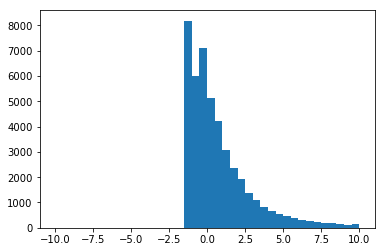

In [136]:
# df.boxplot(column='z_amar')
plt.hist(df.z_amar, bins = 40, range = (-10,10))

# There are  + and - values

In [ ]:
# BEG Number of cases under treatment
plt.hist(df.beg, bins = 40, range = (df.beg.min(),1999))

# There are serious errors in beg
# Needs greater analysis

In [ ]:
print df.beg.quantile([0.25,0.75])
# Quantiles of each object.

In [138]:
print -1.3 / 3

-0.433333333333


In [ ]:
# %quickref
# help
help(datetime)

In [ ]:
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)